Why semi-supervised learning?

In [1]:
import os
os.chdir("../..")

https://stats.stackexchange.com/questions/321841/what-are-variational-autoencoders-and-to-what-learning-tasks-are-they-used

Ideal parameters:
$$ \min_{\boldsymbol{\lambda}}\mathcal{D}[p(\mathbf{z}\vert \mathbf{x})\vert\vert q(\mathbf{z}\vert \mathbf{x},\boldsymbol{\lambda})] $$

It should also minimize the reconstruction loss (and optional regularization terms, mainly L1 or L2)

VAE loss function:
$$ELBO(\boldsymbol{\lambda})= E_{q(\boldsymbol{z}\vert \mathbf{x},\boldsymbol{\lambda})}[\log p(\mathbf{x}\vert\boldsymbol{z})]-\mathcal{D}[(q(\boldsymbol{z}\vert \mathbf{x},\boldsymbol{\lambda})\vert\vert p(\boldsymbol{z})]$$

$$ q(\mathbf{z}\vert \mathbf{x},\boldsymbol{\lambda}) = \mathcal{N}(\mathbf{z}\vert\boldsymbol{\mu}(\mathbf{x}), \boldsymbol{\sigma}^2(\mathbf{x})I) $$

conditional distribution:
$$ p_{\boldsymbol{\phi}}(\mathbf{x}\vert\mathbf{z}) = \mathcal{N}(\mathbf{x}|\boldsymbol{\mu}(\mathbf{z}; \boldsymbol{\phi}), \boldsymbol{\sigma}(\mathbf{z}; \boldsymbol{\phi})^2I)$$


$$ ELBO(\boldsymbol{\theta},\boldsymbol{\phi})= \sum_i E_{q_{\boldsymbol{\theta}}(\boldsymbol{z}\vert \mathbf{x}_i,\boldsymbol{\lambda})}[\log p_{\boldsymbol{\phi}}(\mathbf{x}_i\vert\boldsymbol{z})]-\mathcal{D}[(q_{\boldsymbol{\theta}}(\boldsymbol{z}\vert \mathbf{x}_i,\boldsymbol{\lambda})\vert\vert p(\boldsymbol{z})] $$

In [2]:
# Import packages
from data_preparation.GeoParser import GeoParser
from dimension_reduction.ordination import ordination2d
from sklearn.decomposition import PCA
from IPython.display import Image
import pandas as pd
import numpy as np
load_from_disk = True
load_merge = False


Import models

In [3]:
from models.discriminative.artificial_neural_networks.hebbian_network.HebbNet import HebbNet
from models.discriminative.artificial_neural_networks.MultiLayerPerceptron import MLP
from utils.utils import dict_of_int_highest_elements, plot_evaluation

Using TensorFlow backend.


In [4]:
geo_ids = ["GSE33000"]
# files_destinations
home_path = "/home/simon/"
destination_folder = "annleukemia"
data_folder = "data"
results_folder = "results"
meta_destination_folder = "pandas_meta_df"

plots_folder_path = "/".join([home_path, destination_folder, results_folder, "plots/"])


In [5]:
#dataset_name = "gse33000_and_GSE24335_GSE44768_GSE44771_GSE44770"
dataset_name = "gse33000+4"
activation = "relu"
#nrep = 3
early_stopping = 200
n_epochs = 1000
gt_input = 0
extra_class=True
# if ladder is yes builds a ladder vae. Do not combine with auxiliary (yet; might be possible and relatively 
# not too hard to implement, but might be overkill. Might be interesting too)
translate = "n" 


In [6]:
# Types of deep generative model

# Convolution neural network (convolutional VAE and convolutional classifier)
use_conv = False #Not applicable if not sequence (images, videos, sentences, DNA...)

Definition of the hyper-parameters

In [7]:
lr = 1e-5
l1 = 1e-8
l2 = 1e-8
batch_size = 32
#mc = 1 
#iw = 1 

# Neurons layers
h_dims = [1024, 128]


In [8]:
from utils.utils import adapt_datasets
g = GeoParser(home_path=home_path, geo_ids=geo_ids)
g.get_geo(load_from_disk=load_from_disk, automatic_attribute_list=None)
meta_df = g.merge_datasets(load_from_disk=load_merge, labelled=True)
if translate is "y":
    for geo_id in geo_ids:
        g.translate_indices_df(geo_id, labelled=True)
    for geo_id in unlabelled_geo_ids:
        g.translate_indices_df(geo_id, labelled=False)



Running: GSE33000
Loading GSE33000, labelled: True ...
File found at location: /home/simon//annleukemia/data//GSE33000_labelledTrue_dataframe.pickle.npy
self.df[geo_id] (35371, 624)
Preparing for merging the selected datasets... labelled: True
The file you were looking for is there
File found!
merging file: 1 / 1
(35371, 624)
Saving files...
Merged sets loaded.


In [9]:
# TODO CHANGE hard coded input size, should be easy to get from get_geo
labels = set(list(meta_df.columns))
print(labels)
mlp = MLP(input_size=meta_df.shape[0], input_shape=(meta_df.shape[0]), 
          indices_names=list(range(meta_df.shape[0])), num_classes=len(labels), 
          h_dims=h_dims, extra_class=extra_class, l1=l1, l2=l2, batch_norm=True)

mlp.set_configs(home_path=home_path, results_folder=results_folder, data_folder=data_folder,
                destination_folder=destination_folder, dataset_name=dataset_name, lr=lr,
                meta_destination_folder="meta_pandas_dataframes", csv_filename="csv_loggers", 
                is_unlabelled=False)

{"   Huntington's disease", "   Alzheimer's disease", '   non-demented'}
self.input_size 35371


In [10]:
print("Labeled data shape (35371, 624)", meta_df.shape)
if meta_df is not None:
    mlp.import_dataframe(meta_df, batch_size, labelled=True)

Labeled data shape (35371, 624) (35371, 624)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


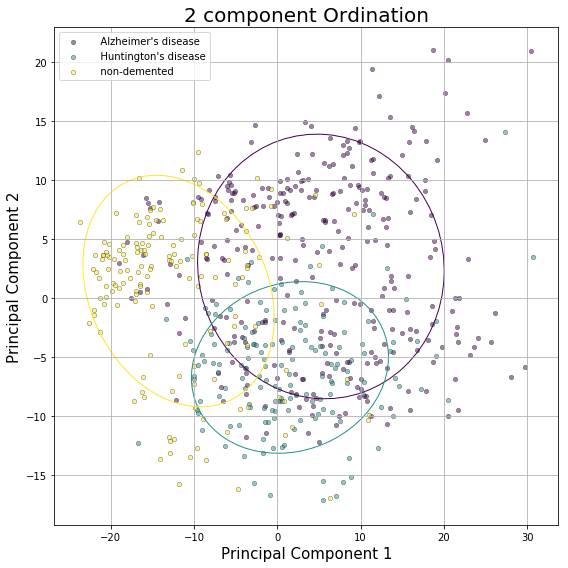

In [11]:
ordination2d(meta_df, epoch="pre", dataset_name=dataset_name, ord_type="pca",
             images_folder_path=plots_folder_path)

In [12]:
subset = meta_df[0:1000]

In [13]:
#tSNE
#ordination2d(subset, epoch="pre", dataset_name=dataset_name, ord_type="tsne", images_folder_path=plots_folder_path)

In [14]:
#mlp.define_configurations(early_stopping=early_stopping, warmup=warmup, flavour=vae_flavour)
print("train data shape", meta_df.shape)


train data shape (35371, 624)


Random train/valid split 0
499 train samples
62 valid samples
63 valid samples
624 total samples
No unlabelled data
self.train_loader 16
self.train_loader 32
self.train_loader <torch.utils.data.sampler.RandomSampler object at 0x7f1264766898>
Log file created:  logs/MLP_parameters.log
Log file created:  logs/MLP_involvment.log
Log file created:  logs/MLP.log
Labeled shape 16


/home/simon/annleukemia/utils/plots.py:16: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  ax.plot(x, mlab.normpdf(x, mu, sigma))


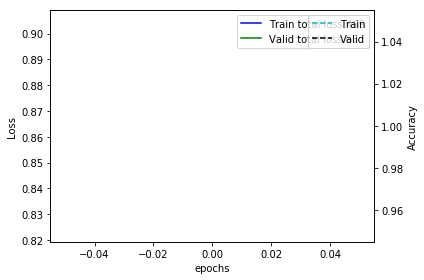

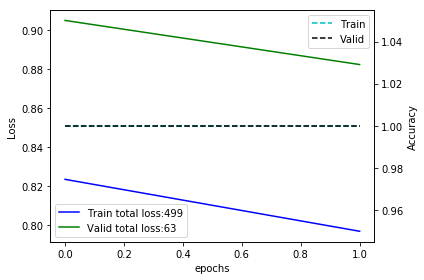

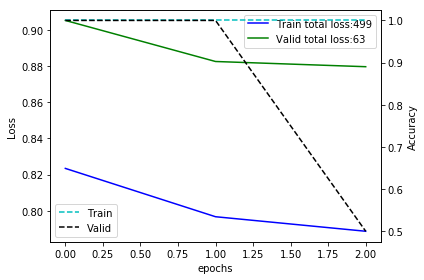

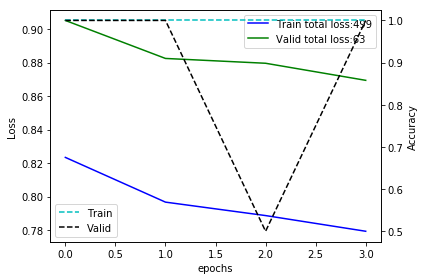

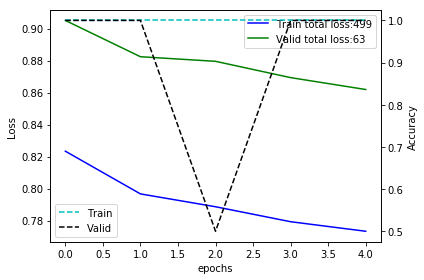

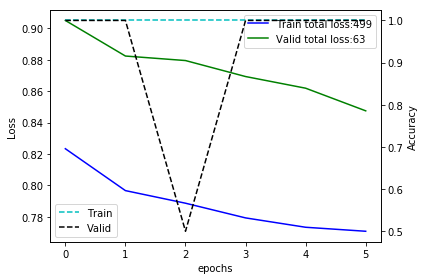

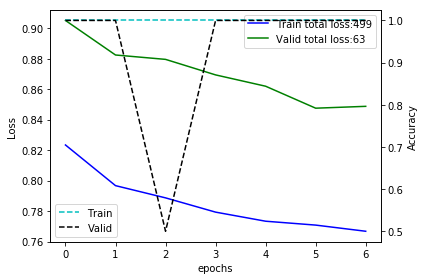

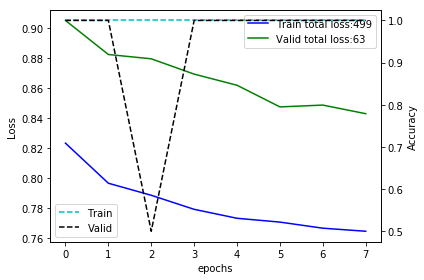

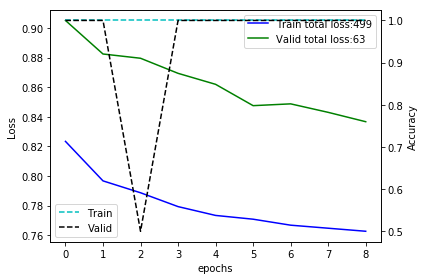

KeyboardInterrupt: 

In [15]:
# dgm.vae.generate_random(False, batch_size, z1_size, [1, 28, 28])

train_total_loss_histories = [[] for x in range(10)]
train_accuracy_histories = [[] for x in range(10)]
valid_total_loss_histories = [[] for x in range(10)]
valid_accuracy_histories = [[] for x in range(10)]
for i in range(10):
    print("Random train/valid split", i)
    mlp.set_data(labels_per_class=-1, is_example=False, extra_class=extra_class)
    mlp.glorot_init()
    mlp.run(n_epochs, verbose=0, show_progress=10, hist_epoch=20, is_balanced_relu=False, all0=False)
    
    

References
Auto-Encoding Variational Bayes https://arxiv.org/abs/1312.6114
Semi-Supervised Learning with Deep Generative Models https://arxiv.org/abs/1406.5298
Ladder Variational Autoencoders https://arxiv.org/abs/1602.02282
Auxiliary Deep Generative Models    https://arxiv.org/abs/1602.05473
Sylvester Normalizing Flows for Variational Inference  https://arxiv.org/abs/1803.05649
Improving Variational Auto-Encoders using Householder Flow https://arxiv.org/abs/1611.09630
Variational Inference with Normalizing Flows https://arxiv.org/abs/1505.05770
Convex combination linear IAF and the Householder Flow, J.M. Tomczak & M. Welling https://jmtomczak.github.io/deebmed.html

Github Ressources:
    https://github.com/wohlert/semi-supervised-pytorch
    https://github.com/jmtomczak/vae_vpflows
    https://github.com/jmtomczak/vae_householder_flow